In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import fbprophet as fbp
from datetime import datetime, timedelta
stock = 'AAPL'
source = 'yahoo'
start = datetime(2018,1,1)
end = datetime.today()
df = web.DataReader(stock, source, start, end)
df['Median']  = (df['High'] - df['Low']) * 0.5 + df['Low']
df = df.reset_index()
df = df[['Date','Median']]
df.columns = ['ds', 'y']

In [38]:
prophet = fbp.Prophet()

In [39]:
prophet.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
future = prophet.make_future_dataframe(periods=365)

In [41]:
forecast = prophet.predict(future)

In [42]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-02,46.808188,38.726657,47.388664,46.808188,46.808188,-3.676664,-3.676664,-3.676664,1.005987,1.005987,1.005987,-4.682651,-4.682651,-4.682651,0.0,0.0,0.0,43.131524
1,2018-01-03,46.802578,39.315370,47.522837,46.802578,46.802578,-3.688372,-3.688372,-3.688372,1.079740,1.079740,1.079740,-4.768112,-4.768112,-4.768112,0.0,0.0,0.0,43.114205
2,2018-01-04,46.796967,38.814370,47.189012,46.796967,46.796967,-3.848994,-3.848994,-3.848994,0.991273,0.991273,0.991273,-4.840267,-4.840267,-4.840267,0.0,0.0,0.0,42.947973
3,2018-01-05,46.791356,38.502976,46.414855,46.791356,46.791356,-4.194075,-4.194075,-4.194075,0.702990,0.702990,0.702990,-4.897064,-4.897064,-4.897064,0.0,0.0,0.0,42.597281
4,2018-01-08,46.774523,38.006977,46.669935,46.774523,46.774523,-4.282954,-4.282954,-4.282954,0.677902,0.677902,0.677902,-4.960856,-4.960856,-4.960856,0.0,0.0,0.0,42.491570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2021-12-25,212.889152,152.056753,264.447589,157.799556,270.444138,-6.069159,-6.069159,-6.069159,-2.228946,-2.228946,-2.228946,-3.840213,-3.840213,-3.840213,0.0,0.0,0.0,206.819993
1115,2021-12-26,213.117378,151.750242,265.071619,157.844015,270.899729,-6.163546,-6.163546,-6.163546,-2.228946,-2.228946,-2.228946,-3.934601,-3.934601,-3.934601,0.0,0.0,0.0,206.953832
1116,2021-12-27,213.345605,154.607968,269.460988,157.849272,271.355320,-3.359629,-3.359629,-3.359629,0.677902,0.677902,0.677902,-4.037531,-4.037531,-4.037531,0.0,0.0,0.0,209.985976
1117,2021-12-28,213.573831,153.388951,268.001907,157.854530,271.810911,-3.140509,-3.140509,-3.140509,1.005987,1.005987,1.005987,-4.146496,-4.146496,-4.146496,0.0,0.0,0.0,210.433322


In [44]:
predictions = forecast[forecast.ds > end]
predictions.index = predictions['ds']
predictions = predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
df.index = df['ds']

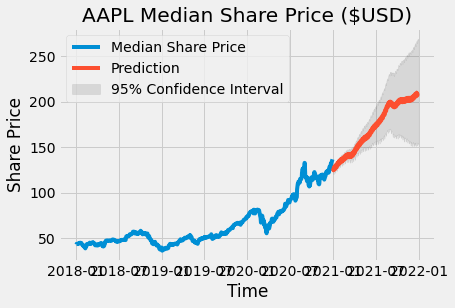

In [45]:
import matplotlib.style
plt.style.use('fivethirtyeight')
plt.plot(df['y'], label='Median Share Price')
plt.plot(predictions['yhat'], label='Prediction')
plt.title("AAPL Median Share Price ($USD)")
plt.fill_between(predictions.index, predictions['yhat_lower'], predictions['yhat_upper'], color='k', alpha=0.1, label='95% Confidence Interval')
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.ylabel("Share Price")
plt.show()